# Библиотеки для работы

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
import pandas as pd
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

from scipy import stats as st

# Ознакомление с данными

In [2]:
games = pd.read_csv('games.csv').copy()

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.columns = map(str.lower, games.columns)

In [5]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Датафрейм довольно большой, много пропусков. Особенно в полях с рейтингом (возрастным, пользователей, критиков). Есть еще ошибка в формате: дата с форматом float64, оценка пользователей - текст. 

# Подготовка данных

In [6]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'] , format = "%Y") #сменим тип данных 

In [7]:
games.query('user_score == "tbd"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaT,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001-01-01,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003-01-01,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008-01-01,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008-01-01,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


### TBD - отсутствие рейтинга, следственно его лучше заменить на NaN, так как по сути он указывает на отсутствие рейтинга. 

In [8]:
games = games.replace('tbd', np.nan)

In [9]:
games['user_score'] = games['user_score'].astype('float64')

In [10]:
games.isna().sum() #посмотрим пропуски 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
games = games.dropna(subset = ['name', 'year_of_release' ,'genre'])

### Пропуски можно безболезненно выкинуть из столбцов 'name', 'year_of_release' ,'genre'. В остальных столбцах лучше оставить пропуски, не меняя на 0. 

## Добавим новый столбец с общими продажами по миру 

In [12]:
games['world_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

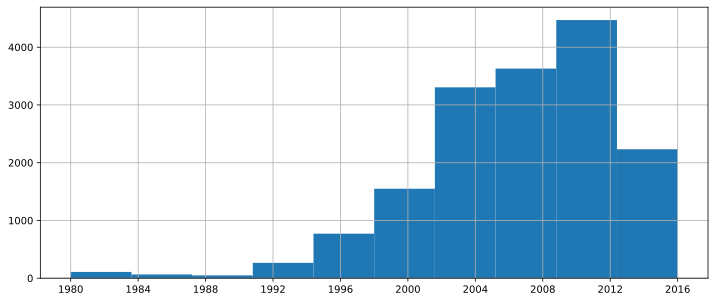

In [13]:
games['year_of_release'].hist();

# Анализ современности 

## Для анализа отберем современные данные, чтобы лучше понимать ситуацию на рынке на сегодняшний день

In [14]:
modern_games = games.query('year_of_release > 2010')
modern_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Посмотрим платформы по популярности

Text(0.5, 1.0, 'Игровые платформы')

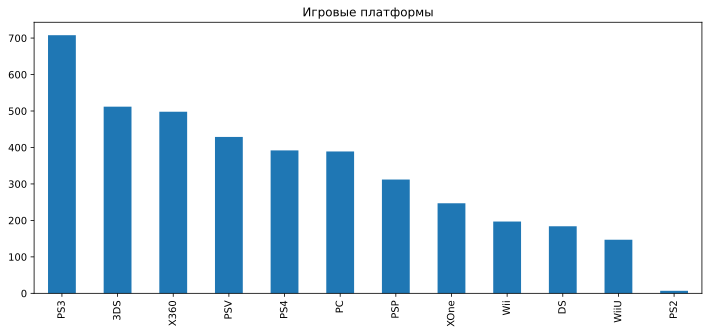

In [15]:
modern_games['platform'].value_counts().plot(kind='bar');
plt.title('Игровые платформы')

### Больше всего игр выходило для приставок PS, так же много игры у приставок от майкрософт. 

### Объем продаж по платформам

Text(0.5, 0, 'Платформы')

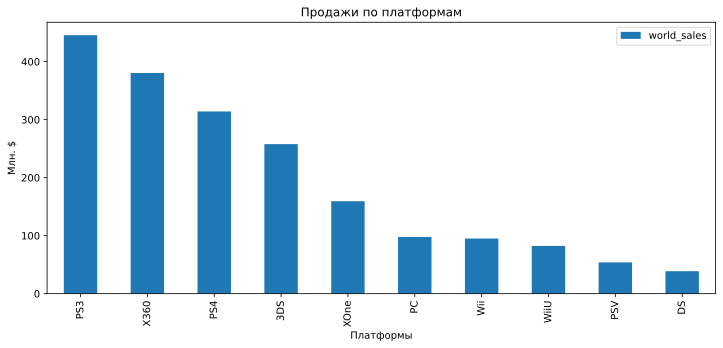

In [16]:
modern_games.pivot_table(index = 'platform', 
                 values = 'world_sales', 
                 aggfunc ='sum').sort_values(by='world_sales',
                                             ascending = False).head(10).plot(kind='bar');
plt.title('Продажи по платформам')
plt.ylabel('Млн. $')
plt.xlabel('Платформы')

### Ситуация похожая с количеством игр: чем больше игр выпускается на платформе, тем больше суммарные продажи. 

## Посмотрим на продажи поподробнее

In [17]:
sales = modern_games.pivot_table(index = ['platform', 'year_of_release'], 
                                 values = 'world_sales', 
                                 aggfunc = 'sum')
sales = sales.reset_index()

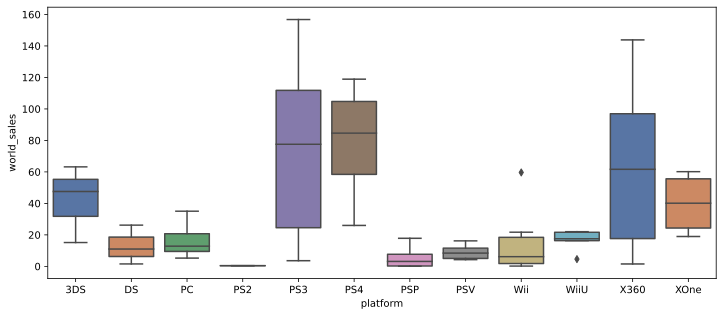

In [18]:
sns.boxplot(x="platform", y="world_sales", data=sales, palette='deep');

Text(0.5, 0, 'Платформы')

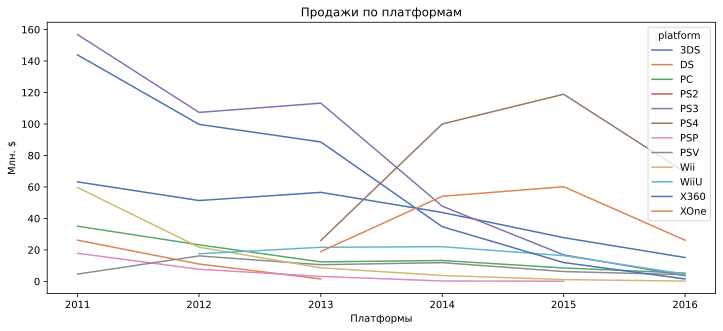

In [19]:
sns.lineplot(x="year_of_release", y="world_sales", hue = 'platform', data=sales, palette="deep");
plt.title('Продажи по платформам')
plt.ylabel('Млн. $')
plt.xlabel('Платформы')

### Динамика у всех платформ всегда одна и та же: сразу после выхода платформы разработчики делают большое количество игр, заполняя нишу, продажи быстро и уверенно растут, но продажи цикличны, после сильного роста они замедляются и начиают падать. Это связано с устареванием платформы, разработчики не тратят много сил на разработку больших проектов, сосредотачиваются на обновлениях и DLC. Как только выходит следующее поколение в платформе, цикл повторяется.

## Взаимосвязь данных 

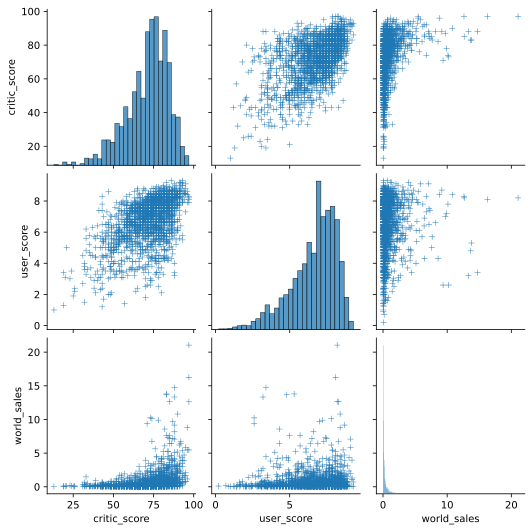

In [20]:
sns.pairplot(modern_games, vars=["critic_score",
                                 "user_score", 
                                 'world_sales'], markers = "+");

In [21]:
modern_games[["critic_score",
                                 "user_score", 
                                 'world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.534853,0.329977
user_score,0.534853,1.000000,0.031636
world_sales,0.329977,0.031636,1.000000


### Видно весьма слабую взаимосвязь между оценками и продажами по миру, но самая сильная связь между оценками критиков и пользователей. То ли пользователи вторят критикам, то ли критики весьма близки к народу.

# Жанры 

In [22]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in modern_games.genre.unique():
    data.append(
        go.Box(y=modern_games[(modern_games.genre==genre) & (modern_games.world_sales <2.5)].world_sales, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

### Уберем сильные выбросы (что больше 2,5 миллионов) и посмотрим на продажи по жанрам. Самые большие продажи в шутерах, платформерах и и спортивных играх, следом идут гонки экшн и файтинги. Сильно мало продаж у приключенческих игр и пазлов. 

# Продажи по регионам

In [23]:
region_sales = modern_games.pivot_table(index=['platform','genre'], values = ['na_sales',
                                                     'eu_sales',
                                                     'jp_sales', 
                                                     'other_sales', 'world_sales'], 
                        aggfunc = 'sum').reset_index()
region_sales

,platform,genre,eu_sales,jp_sales,na_sales,other_sales,world_sales
0,3DS,Action,12.66,22.66,19.62,2.90,57.84
1,3DS,Adventure,0.79,2.76,1.10,0.18,4.83
2,3DS,Fighting,2.21,3.22,4.46,0.67,10.56
3,3DS,Misc,2.38,5.51,2.69,0.41,10.99
4,3DS,Platform,10.51,6.48,13.27,2.27,32.53
...,...,...,...,...,...,...,...
126,XOne,Role-Playing,3.43,0.01,6.15,0.96,10.55
127,XOne,Shooter,17.80,0.16,36.86,5.51,60.33
128,XOne,Simulation,0.31,0.00,0.32,0.06,0.69
129,XOne,Sports,8.73,0.02,15.59,2.40,26.74


## Посмотрим на пользователей из Японии. 

In [24]:
j_users = region_sales[['platform', 'genre','jp_sales']] .sort_values(by = 'jp_sales', ascending = False).head()
j_users

,platform,genre,jp_sales
7,3DS,Role-Playing,41.96
0,3DS,Action,22.66
40,PS3,Action,19.00
47,PS3,Role-Playing,10.54
9,3DS,Simulation,10.39


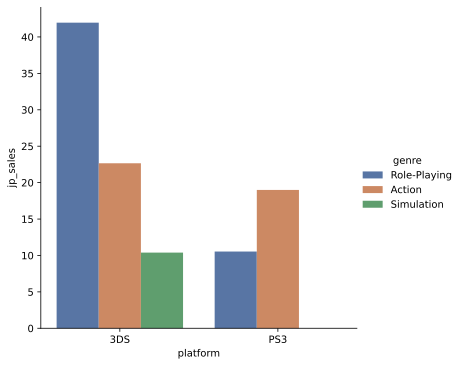

In [25]:
sns.catplot(
    x="platform", y="jp_sales", hue="genre", data=j_users, palette="deep", kind = 'bar');

### Больше всего продаж в японии на платформах 3DS и PS3, причем чаще всего играют в жанры RPG, экшн и симуляторы. Посмотрим на топ-5 жанров. 

In [26]:
j_users_genre = region_sales.pivot_table(index='genre', values ='jp_sales', 
                                         aggfunc = 'sum') .sort_values(by = 'jp_sales',
                                                                       ascending = False).head().reset_index()

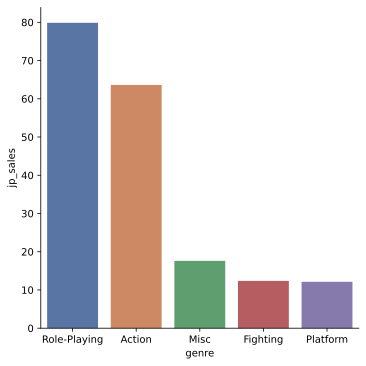

In [27]:
sns.catplot(
    x="genre", y="jp_sales",  data=j_users_genre, palette="deep", kind = 'bar');

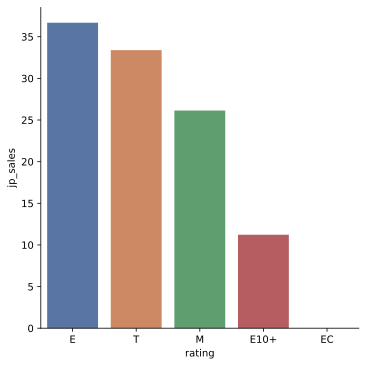

In [28]:
rating_pivot_jp  = modern_games.pivot_table(index = 'rating',
                                            values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',
                                                                                              ascending = False).head().reset_index()
sns.catplot(
    x="rating", y="jp_sales",  data=rating_pivot_jp, palette="deep", kind = 'bar');

### В Японии больше всего играют в знаменитые японские RPG и экшн игры, сразу за ними игры смешенного жанра и платформеры в файтингами - стандартные жанры для японского рынка.  В Японии видно так же, что больше всего продаж сосредоточено в играх с рейтингом E и M. 

## Пользователи северной Америки

In [29]:
na_users = region_sales[['platform','genre','na_sales']] .sort_values(by = 'na_sales', ascending = False).head()
na_users

,platform,genre,na_sales
116,X360,Shooter,72.30
109,X360,Action,61.58
40,PS3,Action,56.67
48,PS3,Shooter,39.15
127,XOne,Shooter,36.86


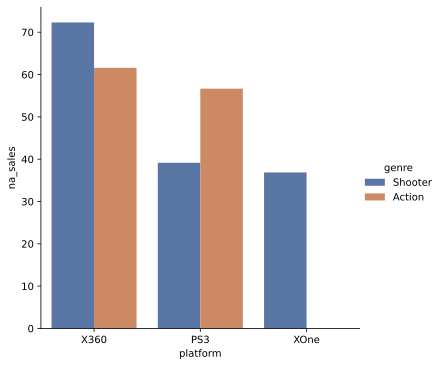

In [30]:
sns.catplot(
    x="platform", y="na_sales", hue="genre", data=na_users, palette="deep", kind = 'bar');

### Больше всего продаж в Америке приходится на платформах от майкрософт и PS3, причем чаще всего играют в жанры экшн и шутеры. Американцы поддерживают внутренний своего производителя, а японцы своего - все логично. Так же в глаза бросается разница в объемах - рынок Америки сильно больше.  Посмотрим на топ-5 жанров. 

In [31]:
na_users_genre = region_sales.pivot_table(index='genre', values ='na_sales',
                                          aggfunc = 'sum') .sort_values(by = 'na_sales',
                                                                        ascending = False).head().reset_index()
na_users_genre

,genre,na_sales
0,Action,230.92
1,Shooter,194.43
2,Sports,108.70
3,Role-Playing,83.78
4,Misc,69.69


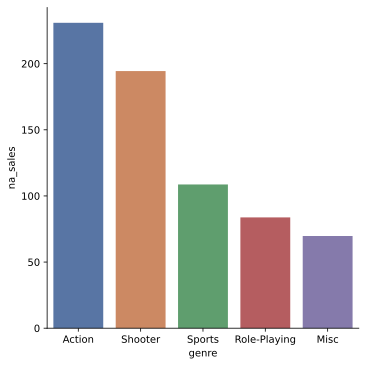

In [32]:
sns.catplot(
    x="genre", y="na_sales",  data=na_users_genre, palette="deep", kind = 'bar');

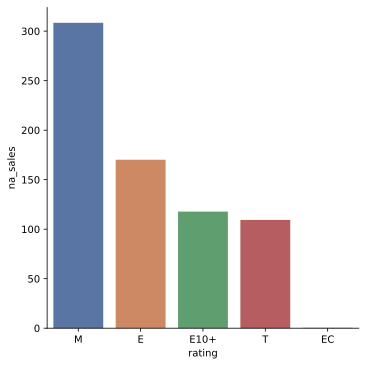

In [33]:
rating_pivot_na  = modern_games.pivot_table(index = 'rating',
                                            values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', 
                                                                                              ascending = False).head().reset_index()
sns.catplot(
    x="rating", y="na_sales",  data=rating_pivot_na, palette="deep", kind = 'bar');

### Самые популярные - экшн и шутеры, так же американцы любят очень спортивные игры. Меняются данные по рейтингу - в лидеры вышли игры с рейтингом M, расчитанные на аудиторию от 17 лет.  

## Пользователи Еропы 

In [34]:
eu_users = region_sales[['platform','genre','eu_sales']] .sort_values(by = 'eu_sales', ascending = False).head()
eu_users

,platform,genre,eu_sales
40,PS3,Action,59.57
52,PS4,Action,42.71
48,PS3,Shooter,40.15
60,PS4,Shooter,39.16
109,X360,Action,37.67


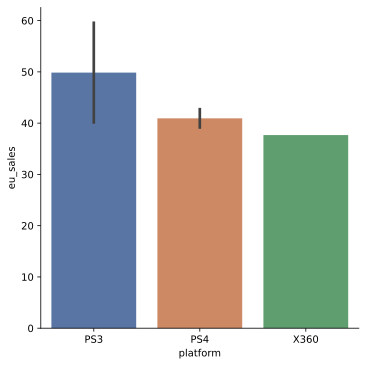

In [35]:
sns.catplot(
    x="platform", y="eu_sales",  data=eu_users, palette="deep", kind = 'bar');

### По платформам европейцы предпочитают PS, объем рынка побольше чем в Японии, поменьше чем в Америке. 

In [36]:
eu_users_genre = region_sales.pivot_table(index='genre',
                                          values ='eu_sales', 
                                          aggfunc = 'sum') .sort_values(by = 'eu_sales',
                                                                        ascending = False).head().reset_index()

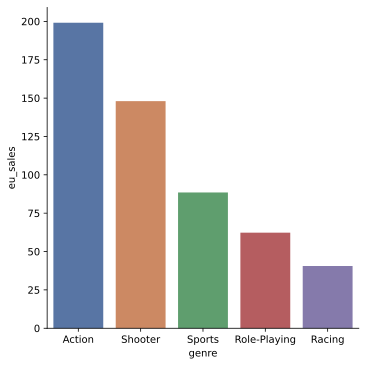

In [37]:
sns.catplot(
    x="genre", y="eu_sales",  data=eu_users_genre, palette="deep", kind = 'bar');

### Жанры не сильно отличаются от Америки, но добавились гонки - европейцы традиционно их любят. 

In [38]:
rating_pivot_eu  = modern_games.pivot_table(index = 'rating',
                                         values = 'eu_sales', 
                                         aggfunc = 'sum').sort_values(by='eu_sales', ascending = False).head().reset_index()

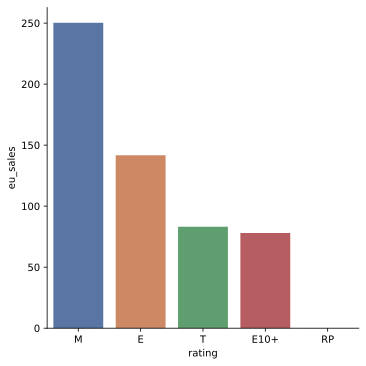

In [39]:
sns.catplot(
    x="rating", y="eu_sales",  data=rating_pivot_eu, palette="deep", kind = 'bar');

### Распределение выручки по рейтингу тоже не сильно отличается от Америки, разве что чуть больше продажи по играм для подростков - рейтинг T. 

# Проверка гипотез

### Сформируем две выборки по платформам с проставленными рейтингами пользователей. 

In [40]:
XOne  = modern_games.query('platform == "XOne"').dropna()

In [41]:
PC  = modern_games.query('platform == "PC"').dropna()

H0: Средние пользовательские рейтинги на плафтформах одинаковые. 

H1: Средние пользовательские рейтинги на плафтформах различаются. 

In [42]:
mean_x_score = XOne['user_score'].mean()

alpha = 0.05

results = st.ttest_1samp(PC['user_score'], mean_x_score)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5330969190761496
Не получилось отвергнуть нулевую гипотезу


### Не удалось опровергнуть нулевую гипотез. Фактически средняя оценка почти не различается, небольшое различие скорее обуславливается случайным фактором. 

In [43]:
mean_x_score

6.49308176100629

In [44]:
PC['user_score'].mean()

6.430232558139535

### Сформируем две выборки по жанрам.

In [45]:
act  = modern_games.query('genre == "Action"').dropna()
spt  = modern_games.query('genre == "Sports"').dropna()


In [46]:
act_mean = act['user_score'].mean()

alpha = 0.05

results = st.ttest_1samp(spt['user_score'], act_mean)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.724243887507538e-14
Отвергаем нулевую гипотезу


In [47]:
act_mean

6.816575591985427

In [48]:
spt['user_score'].mean()

5.9576271186440675

### Получилось опровергнуть нулевую гипотезу - рейтинг между жанрами экшн и спорт - отличаются. И это отличие можно признать статистически значимым. 

# Вывод: 

Мы видем, что за все время игровая индустрия явно набирает обороты, с 80-х она приросла в общем объеме многократно, но с 2012 года объем немного упал. Но и рынок поменялся, все меньше появляется новых платформ, все больше рынок держат устоявшиеся игроки, студии стараются выпускать игры для нового поколения платформ. Старое постепенно теряет в объеме продаж и количестве игр. Важными данными задающими тренд будем считать данные за текущее десятилетие, чтобы можно было захватить хотя бы два поколения основных платформ. 

Самые популярные платформы - PS  и приставки Xbox. Видно, что свежее поколение (PS4 и XOne) только набираются обороты, так же впечатляет объем приставок от Nintendo, но они традиционно сосредотачиваются на локальном рынке - Японии. 

Можно отметить, что объем рынка сейчас падает, но нет возможности установить с чем это может быть связано. Можно предположить, что эта доля перешла во free to play игры и скорее всего их деньги и сосредоточены там, так же не стоит забывать, что за последние 10 лет сильно поменялось соотношение онлайн/офлайн игр, онлайн начинать забирать значительную часть рынка, но продажи там считают редко - многие из этих игры условно бесплатные. 

Так же можно отметить сильную солидарность между критиками и пользователями, скорее всего у них одинаковые критерии оценки игр, да и само общество геймеров довольно серьезно оценивает все работы студий. 

Больше всего люди предпочитают играть в шутеры и платформеры, так же люди любят спортивные игры и экшн. 

Что касается регионов, то основными являются: Япония, северная Америка, Европа. Видно, что Америка и Япония поддерживают свои платформы (Xbox и PS соответсвенно), но при это PS предпочитают европейцы (хороший у них вкус, я вот сам только с PS с 2000 года), интересно, что представители западной культуры больше любят активные и агрессивные игры (экшн, шутеры), а японцы склонны с созерцательным жанрам (RPG). 


Гипотезы: 

Нельзя сказать, что рейтинг на PC и XBOX  различается, что логично - обе платформы имеют практически одинаковый игровой состав. 

Но вот рейтинги между жанром action и sports  - различаются. Думаю, это обуславливается тем, что action лучше продается, следственно, игры с большим бюджетом стараются сделать как можно качественнее. В то время как хороших спортивных симуляторов можно пересчитать по пальцам. 

